In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
# hdu = fits.open('allStarLite-dr17-synspec_rev1.fits')
# hdu[1].header

In [47]:
df1 = pd.read_csv('M67_filtered.csv')
df2 = pd.read_csv('NGC188_filtered.csv')
df = pd.concat([df1,df2],axis=0)
# df = pd.read_csv('Leukemia_GSE9476.csv')
df

,parallax,phot_g_mean_mag,bp_rp
0,1.095887,14.447882,0.835868
1,1.141702,13.718393,0.842082
2,1.130219,14.149156,0.786826
3,1.168392,14.359411,0.968462
4,1.128273,12.562445,0.712632
...,...,...,...
1068,0.296185,16.850050,0.915102
1069,0.590667,17.829206,1.376900
1070,0.501063,15.634735,1.104756
1071,0.314963,14.783065,1.285190


In [4]:
# df_filter = df[['acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']]
# df_filter
# df['type']
# df = df.transpose()
# df

In [5]:
df_cleaned = df.dropna(how='any')
df_cleaned

,parallax,phot_g_mean_mag,bp_rp
0,1.095887,14.447882,0.835868
1,1.141702,13.718393,0.842082
2,1.130219,14.149156,0.786826
3,1.168392,14.359411,0.968462
4,1.128273,12.562445,0.712632
...,...,...,...
1068,0.296185,16.850050,0.915102
1069,0.590667,17.829206,1.376900
1070,0.501063,15.634735,1.104756
1071,0.314963,14.783065,1.285190


In [6]:
# df_cleaned = df_cleaned.sample(n=5000)
# df_cleaned = df_cleaned.apply(pd.to_numeric)
# df_cleaned = df_cleaned.iloc[2:,:]

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df_cleaned)
X.shape

(2013, 3)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)


In [9]:
pca_scaled = pca.fit_transform(X)


In [10]:
pca_scaled.shape

(2013, 2)

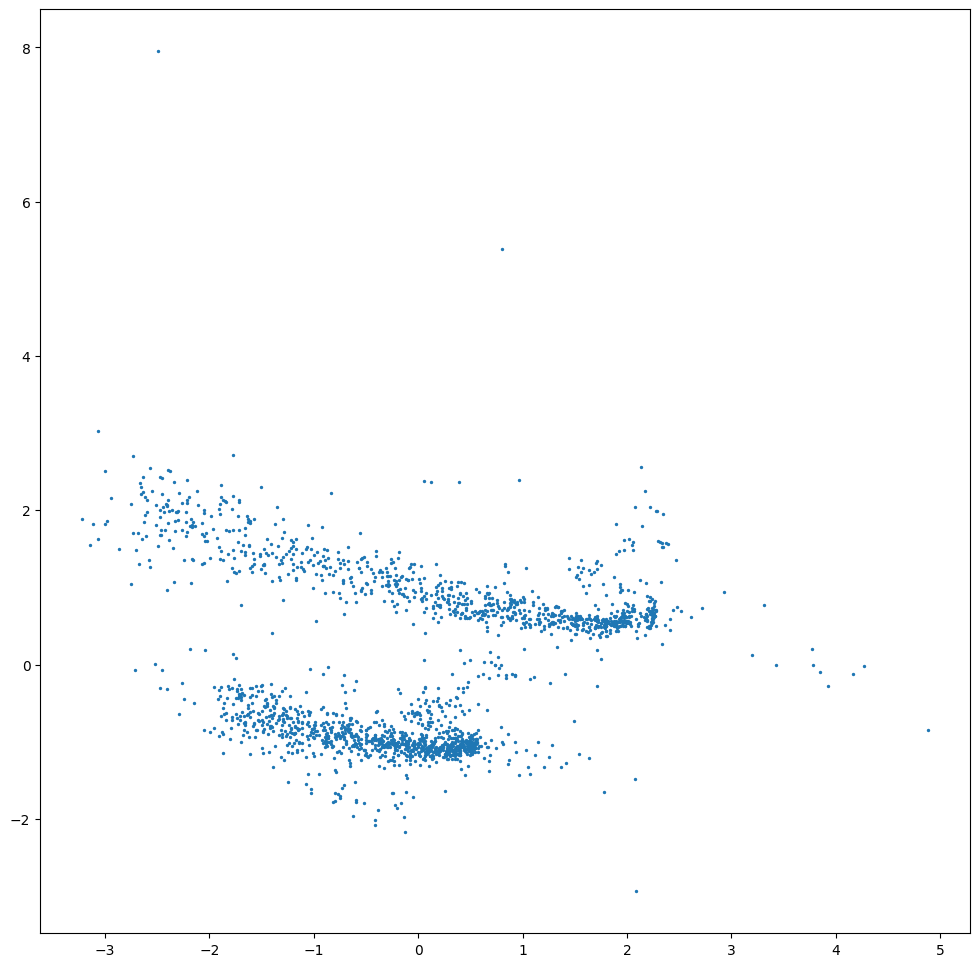

In [11]:
plt.figure(figsize=(12,12))
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],s=2)

# K-Means clustering

In [12]:
from sklearn.cluster import KMeans



In [13]:
wcss = []
for k in range(1,20):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(pca_scaled)
    wcss.append(kmeans.inertia_)

c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [14]:
# arr = df.iloc[:,-1]
# len(np.unique(arr))

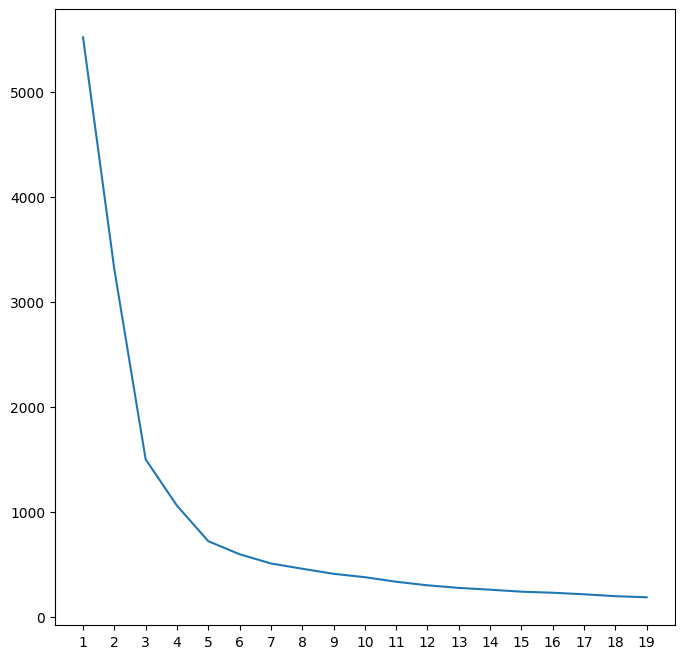

In [15]:
plt.figure(figsize=(8,8))

plt.plot(range(1,20),wcss)
plt.xticks(range(1,20))
plt.show()

In [16]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [17]:
y_labels = kmeans.fit_predict(X=pca_scaled)

c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


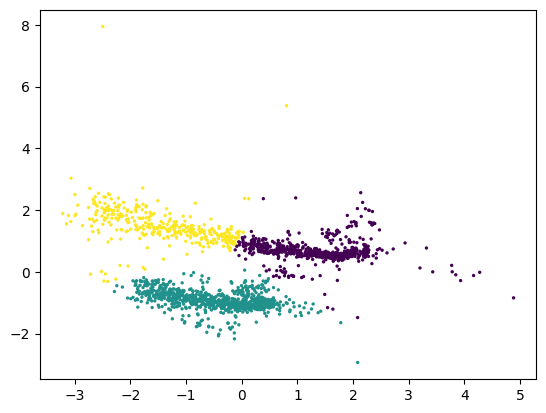

In [18]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=y_labels,s=2)

In [19]:
# %pip install kneed

In [20]:
from kneed import KneeLocator

kl = KneeLocator(range(1,20),wcss,curve='convex',direction='decreasing')
kl.elbow

5

In [22]:
from sklearn.metrics import silhouette_score

silhouette_sc = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(pca_scaled)
    score = silhouette_score(pca_scaled,kmeans.labels_)
    silhouette_sc.append(score)

c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [23]:
silhouette_sc

[0.43540801614797964,
 0.5707768851781398,
 0.5374908050104145,
 0.5388441612726003,
 0.5163663612663327,
 0.4670148721383858,
 0.4486970210655619,
 0.44824309720349553,
 0.4516125499870871]

# Hierarchical Clustering

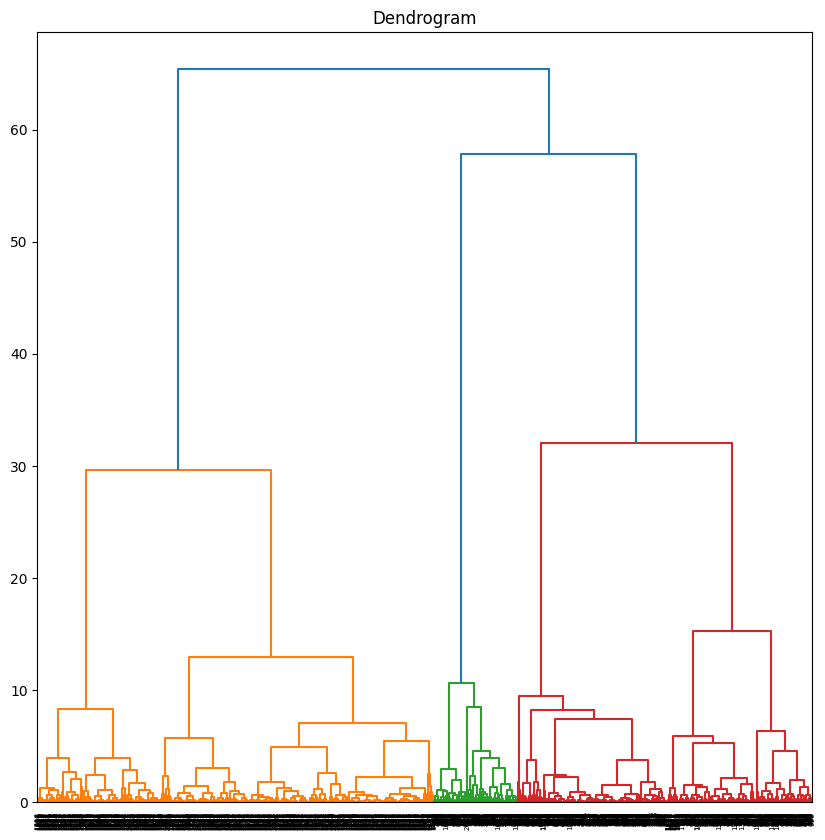

In [24]:
import scipy.cluster.hierarchy as sc

plt.figure(figsize=(10,10))
plt.title('Dendrogram')
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendrogram')
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)

c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [26]:
cluster.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

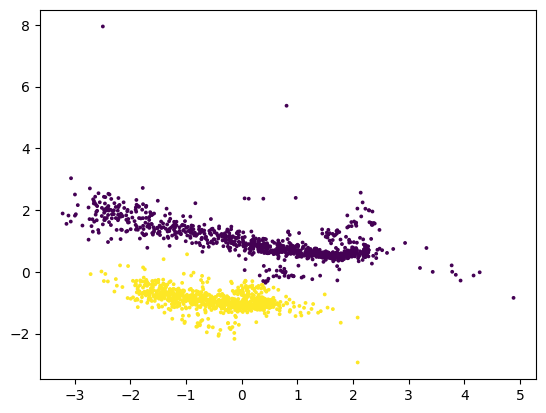

In [27]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_,s=3)

In [28]:
silhouette_sc_hc =[]

for k in range(2,11):
    agglo = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(pca_scaled)
    score = silhouette_score(pca_scaled,agglo.labels_)
    silhouette_sc_hc.append(score)
    

c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\surya\AppDa

In [29]:
silhouette_sc_hc

[0.46027320872649125,
 0.5413032189428889,
 0.5256850010537024,
 0.5294808966321582,
 0.5022928352670726,
 0.4312484097824367,
 0.4190201203047349,
 0.42515019750715477,
 0.4271283839631722]

# DBSCAN

In [30]:
from sklearn.cluster import DBSCAN

In [31]:
dbscan = DBSCAN(eps=0.065)

In [32]:
dbscan.fit(pca_scaled)

DBSCAN(eps=0.065)

In [33]:
dbscan.labels_

array([-1,  0,  0, ..., 15, 15, -1], dtype=int64)

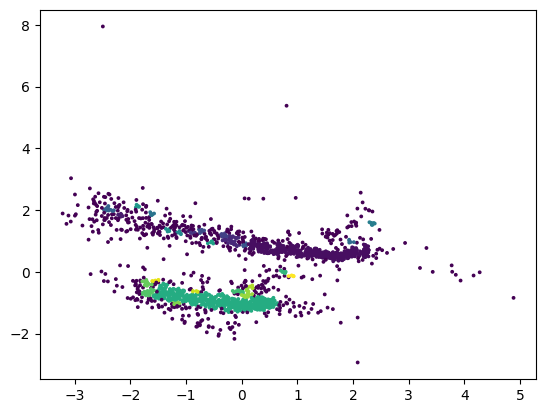

In [34]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=dbscan.labels_,s=3)

In [37]:
# dbs = DBSCAN(eps=0.065)
# dbs.fit(pca_scaled)
score = silhouette_score(pca_scaled,dbscan.labels_)
silhouette_sc_dbscan= score
silhouette_sc_dbscan

-0.39182262659391104

# GMM

In [38]:
from sklearn.mixture import GaussianMixture

In [39]:
gm = GaussianMixture(n_components=2).fit(pca_scaled)
gm.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 2,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [40]:
centers = gm.means_
centers

array([[-0.59723722, -0.34046928],
       [ 1.29081371,  0.73585904]])

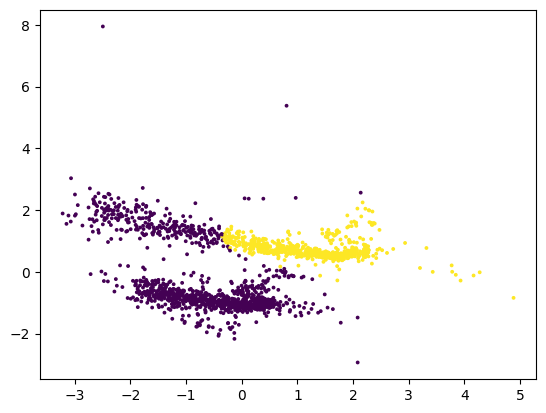

In [41]:
pred = gm.predict(pca_scaled)

plt.scatter(pca_scaled[:,0],pca_scaled[:,1],s=3,c=pred)


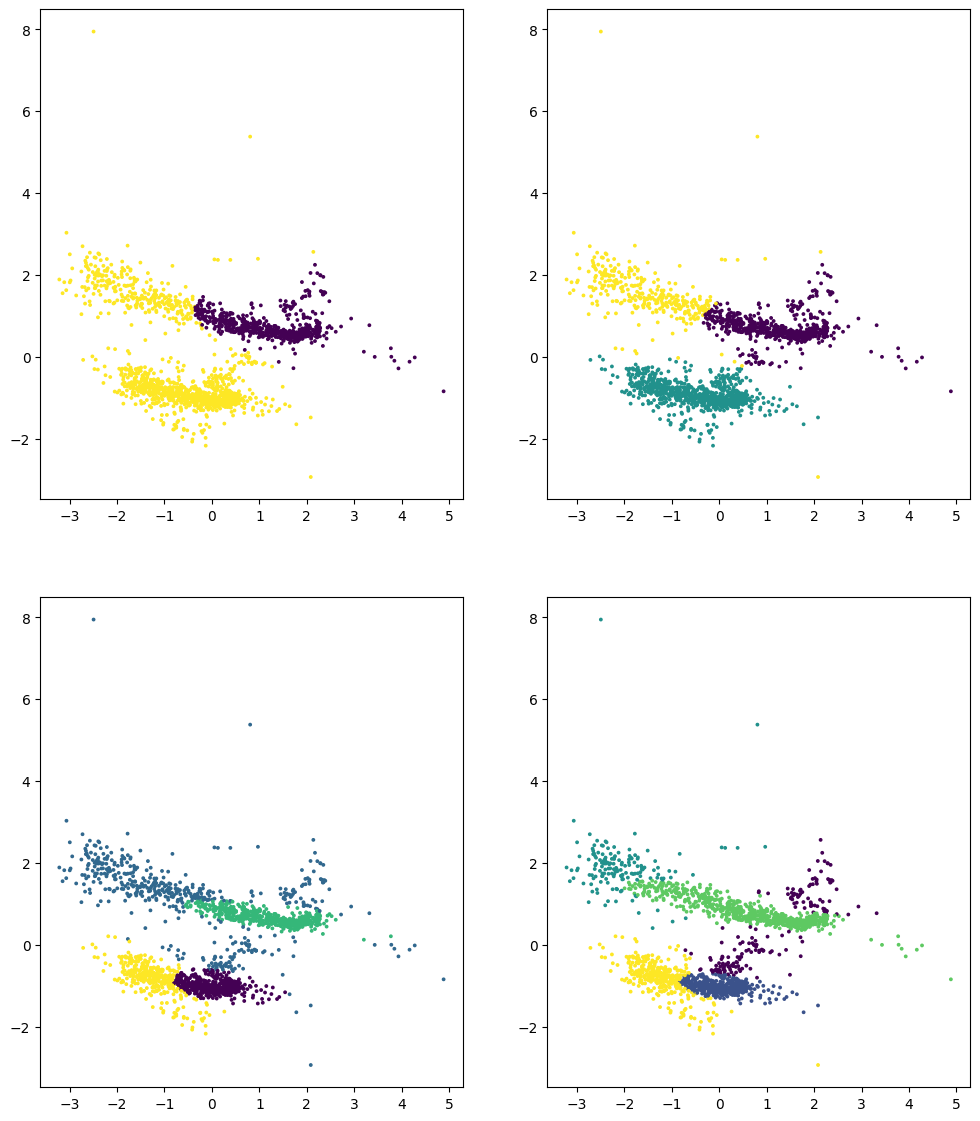

In [46]:
fig = plt.figure(figsize=(12,14))
# fig.add_subplot(2,2,1)
for n in range(2,6):
    gm = GaussianMixture(n_components=n).fit(pca_scaled)
    pred = gm.predict(pca_scaled)
    fig.add_subplot(2,2,n-1)
    plt.scatter(pca_scaled[:,0],pca_scaled[:,1],s=3,c=pred)

